# Árvores Binomiais

Após completar este capítulo, você será capaz de:

- Calcular o valor de opções call e put, europeias e americanas usando o modelo de árvore binomial;
- Compreender o conceito de mundo neutro ao risco;
- Descrever como a volatilidade é capturada no modelo de árvore binomial;
- Definir e calcular o delta de opções sobre ações;
- Explicar como o modelo de árvore pode ser alterado para precificar opções sobre ações com dividendos, moedas, índices e futuros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix # Opcional

## Introdução

Nesta capítulo, será apresentado um modelo de apreçamento chamado **árvore binomial**. Esta técnica foi proposta por Cox, Ross e Rubinstein (1979) e é amplamente usado para precificar opções do tipo americano e outros derivativos.

Derivativos são valorizados usando o que chamamos de **argumento de não arbitragem**. Isto significa que os preços são calculados sob a hipótese de que não há oportunidades de arbitragem para os participantes do mercado. Árvores binomiais são uma forma conveniente de ilustrar como o argumento de não arbitragem é aplicado a derivativos.

Também utilizaremos as árvores binomiais para introduzir o que é conhecido como **medida neutra ao risco** (*risk-neutral valuation*). Este é um resultado que permite que derivativos sejam avaliados assumindo que os participantes do mercado exijam um retorno esperado igual à taxa livre de risco em todos os investimentos (ou seja, não fazem nenhum ajuste para risco ao calcular os retornos esperados).


## Árvores de um passo

Suponha que uma ação vale R\\$ 50,00 e pode apresentar um retorno de +20\% ou -20\% pelos próximos 3 meses. Em outras palavras, o preço da ação será R\\$ 60,00 ou R\\$ 40,00 no final dos 3 meses. Assuma que a ação não pagará dividendos no período.

Considere uma call sobre esta ação de 3 meses com o strike de R\\$ 52,00. Se o preço da ação for R\\$ 60,00, o payoff da opção será R\\$ 8,00. Se o preço for R\\$ 40,00, o payoff será R\\$ 0,00. A situação é ilustrada na figura a seguir.

![Árvore de 1 passo](Imagens\12_01_Árvore_1_Passo.png)
**Figura 1**: Movimentos do preço da ação e do payoff da call com strike de R\\$ 52,00.


*Quanto vale esta opção no instante atual?*

O preço da opção pode ser calculado apenas com a taxa livre de risco de 3 meses, sem nenhuma informação adicional, nem mesmo as probabilidades de ocorrência de cada um dos cenários.

Considere um portfólio com uma posição comprada de $\Delta$ ações e uma posição vendida de uma opção call. O valor do portfólio passados os 3 meses será um dentre:

- Se a ação subir para 60, a opção vale 8 e o valor do portfólio será:

$$ 60 \Delta - 8 $$

Note que a opção custa 8 para o portfólio pois a posição vendida exige que uma ação que vale 60 seja vendida por 52.

- Se a ação cair para 40, a opção não vale nada e o portfólio vale

$$ 40 \Delta $$

Se:

$$ 60 \Delta - 8 = 40 \Delta $$

então o portfólio tem o mesmo valor em 3 meses para qualquer cenário. Resolvendo esta equação, temos que:

$$ \Delta = 0.4 $$

E o valor final do portfólio é R\\$ 16,00:

$$ 16 =  60 \cdot 0.4 - 8 = 40 \cdot 0.4 $$

Agora suponha também que a taxa livre de risco para 3 meses é 3% (composta continuamente). Se o portfólio vale (com certeza) R\\$ 16,00 em 3 meses, então ele vale hoje R\\$ 15.88 hoje:

$$ 16 e^{-0.03 \cdot 0.25} = 15.88 $$

Caso contrário, haveria oportunidade de arbitragem.

Seja *f* o preço da opção call. O valor da posição comprada em 0.4 ações é 20 (0.4 x 50). O valor do portfólio hoje é, portanto, $20 - f$. Por não arbitragem, precisamos que:

$$ 20 - f = 15.88 $$

ou $ f = 4.12$. Portanto, uma opção call para comprar uma ação deve valer hoje 4.12, pois qualquer outro preço geraria a presença de arbitragem.

In [ ]:
# Definindo parâmetros e valores iniciais
S0 = 50 # Preço spot em t_0
T = 0.25 # Prazo = 3 meses
K = 52 # Strike 
r = 0.03 # Taxa livre de risco contínua

u = 1.20 # Movimento up # + 20%
d = 0.80 # Movimento down # - 20%




Su: 60.0, Sd: 40.0


In [ ]:
# Árvore de 1 passo
# Dinâmica do ativo objeto (S)
Su = S0*u
Sd = S0*d

print(f'Su: {Su}, Sd: {Sd}')

In [ ]:
# Dinâmica da opção call
#payoff = max(S_T - K, 0)
Cu = max(Su - K, 0)
Cd = max(Sd - K, 0)

print(f'Cu: {Cu}, Cd: {Cd}')

Cu: 8.0, Cd: 0


In [ ]:
# Delta
delta = (Cu - Cd)/(Su - Sd)

print(delta)

0.4


## Generalização

Suponha que o preço de uma ação que não paga dividendos no instante atual seja $S$ e que durante um tempo $T$ ele pode subir para $Su$ (retorno de $u - 1$) ou cair para $Sd$ (retorno de $d - 1$). 
Considere u, derivativo (que não precisa ser uma opção) que possui um payoff $f_u$ se o preço subir e um payoff de $f_d$ se o preço cair.


![Árvore de 1 passo](Imagens\12_02_Árvore_1_Passo_Gen.png)
**Figura 2**: Modelo de um passo generalizado. $S$ e $f$ são o preço da ação e do derivativo iniciais, $f_u$ e $f_d$ são os payoffs do derivativo quando há um movimento para cima ou para baixo no preço da ação, respectivamente.


Então, construímos o seguinte portfólio:

- Uma posição vendida de uma unidade do derivativo, e
- Uma posição de $\Delta$ ações.

Onde:

$$ \Delta = \frac{f_u - f_d}{Su - Sd} $$

O valor do portfólio no instante $T$ será:

- $Su \Delta - f_u $ se o preço da ação subir, e
- $Sd \Delta - f_d $ se o preço da ação cair.

Pode ser provado que esses dois são iguais para o valor de $\Delta$ apresentado acima. para este $\Delta$, o valor do portfólio no instante $T$ (em qualquer dos casos) é:

$$ Su \frac{f_u - f_d}{Su - Sd} - f_u = \frac{f_u d - f_d u}{u - d} = Sd \frac{f_u - f_d}{Su - Sd} - f_d $$

O valor do portfólio hoje é $S\Delta - f$, onde $f$ é o valor do derivativo hoje. 

Suponha que $r$ é a taxa livre de risco para o vencimento $T$. Por não arbitragem, temos:

$$S \Delta - f = \frac{f_u d - f_d u}{u - d} e^{-rT} $$

Substituindo $\Delta$, temos:

$$ f_u - f_d - f(u - d) = (f_u d - f_d u)e^{-rT} $$

Ou:

$$ f = f_u \frac{1 - de^{-rT}}{u - d} + f_d \frac{ue^{-rT} - 1}{u - d}$$

Que pode ser escrito como:

$$ f = e^{-rT} [p f_u + (1 - p) f_d] $$

Onde:

$$ p = \frac{e^{rT} - d}{u - d} $$

**Exemplo**

Suponha que a opção abordada no início (da figura 1) fosse uma put de strike 52, ao invés de uma call. Podemos calcular $p$ pela última equação:

$$ p = \frac{e^{0.03 \cdot 0.25} - 0.8}{1.2 - 0.8} = 0.5188 $$

Neste caso, $f_u = 0$ e $f_d = 12$ e podemos obter o valor de $f$ (preço da put hoje) pela penúltima equação:

$$ f = e^{0.03 \cdot 0.25} [0.5188 \cdot 0 + (1 - 0.5188) \cdot 12] = 5.731 $$ 

Nós introduzimos a paridade put-call na aula 6 de opções. Ela afirma que quando uma put e uma call europeias sobre uma ação que não paga dividendos possuem mesmo strike e vencimento:

$$ Call + Strike \cdot e^{-rT} = Put + Spot_{Acao} $$

A paridade put-call também vale neste nosso exemplo. O valor da call calculado anteriormente é 4.12, o valor presente do strike é 51.611 ($=52 \cdot e^{0.03 \cdot 0.25}$ ), o preço da put que acabamos de calcular é 5.731 e o preço da ação hoje é 50. Portanto, temos:

$$ 4.12 + 51.611 = 5.731 + 50 $$

Vale ressaltar que a análise realizada não requer que saibamos as probabilidades de um movimento de alta ou queda nos preços. Isto porque nós avaliamos um derivativo em termos do preço da ação, e portanto o retorno do derivativo depende do retorno da ação. 

In [ ]:
K = 52
r = 0.03
t = 0.25
u = 1.20
d = 0.80

p = (np.exp(r*t) - d)/ (u - d)
print(f'P: {p}')

Su = S0*u # Fator up
Sd = S0*d # Fator down

call = np.exp(-r*t) * (p*Cu + (1-p)*Cd)

Pu = max(K - Su, 0) # payoff da put
Pd = max(K - Sd, 0)

print(f'Pu: {Pu}, Pd: {Pd}')
put = np.exp(-r*t) * (p*Pu + (1-p)*Pd)

put_paridade = K*np.exp(-r*t) + call - S0 # K*e^{-rt} + call - Spot

print(f'Call: {round(call, 2)}, Put: {round(put, 2)}, Put paridade: {round(put_paridade, 2)}')

P: 0.5188204886113347
Pu: 0, Pd: 12.0
Call: 4.12, Put: 5.73, Put paridade: 5.73


## Avaliação neutra ao risco

Definimos um mundo neutro ao risco como um onde investidores não ajustam seus retornos esperados pelo risco, de tal forma que o retorno esperado em todos os ativos seja a taxa livre de risco. Colocando em outras palavras, num mundo neutro ao risco, todos os ativos negociáveis tem um retorno esperado igual à taxa livre de risco.

As probabilidades de diferentes resultados num mundo neutro ao risco são portanto baseados nesta premissa, e um investidor não tem preferência entre ativos com diferentes níveis de risco.

O princípio da avaliação neutra ao risco afirma que se assumirmos que estamos num mundo neutro ao risco, nós obtemos o valor justo de um derivativo. No fim das contas, o preço obtido é correto no mundo real (onde investidores se importam com o risco), assim como no mundo neutro ao risco.

Primeiro, note que se escolhermos interpretar a variável $p$ como a probabilidade de um movimento de subida (e $1 - p$ de queda), então:

$$ p f_u + (1 - p) f_d $$

é o payoff esperado do derivativo no instante $T$. Ademais, o valor do derivativo hoje ($f$) é o valor presente do payoff esperado no instante $T$ descontado pela taxa livre de risco.

Em segundo lugar, note que se continuarmos a interpretar $p$ como esta probabilidade, o preço esperado da ação em $T$ é:

$$ Sdp + Sd(1-p) $$

Substituindo $p$, temos:

$$ Su \frac{e^{-rT} - d}{u - d} + Sd \frac{u - e^{-rT}}{u - d} = S e^{rT} $$

Isto mostra que o preço da ação cresce à taxa livre de risco. E também mostra que $p$ é a probabilidade de um movimento de alta um mundo neutro ao risco.

Em suma, se assumirmos um mundo neutro ao risco, a probabilidade de um movimento de alta é $p$, e o valor do derivativo é o payoff esperado descontado pela taxa livre de risco.

Devemos enfatizar que a avaliação neutra ao risco nada mais é do que uma forma artificial de avaliar derivativos. Não estamos assumindo que o mundo é de fato neutro ao risco. Ao invés disso, estamos apenas argumentando que o preço de um derivativo é o mesmo no mundo real e num mundo hipotético neutro ao risco.

Suponha que a probabilidade de um movimento para cima no mundo real seja 0.6. Isso significa que o retorno esperado da ação após 3 meses será 4% ($= 0.6 \cdot 20\% - 0.4 \cdot 20\%$). O retorno esperado da call no mundo real seria:

$$ \frac{0.6 \cdot 8 + 0.4 \cdot 0}{4.12} - 1 = 16.5\% $$

Isso mostra que o retorno esperado da call é muito maior que o da ação no mundo real que supomos. A ação provê um retorno que reflete o risco sistemático. A call possui uma alavancagem por definição e portanto acentua o risco.

Agora, suponha que a opção é uma put com o mesmo strike. Como vimos na seção anterior, seu preço é 5.731. O retorno esperado para esta put por 3 meses é:

$$ \frac{0.6 \cdot 0 + 0.4 \cdot 12}{5.731} - 1 = -16.2\% $$

Este resultado pode parecer uma surpresa. Por que um produto com tanto risco como uma put apresenta um retorno esperado negativo?

O preço da ação apresenta um retorno esperado acima da taxa livre de risco, pois possui risco sistemático positivo (quando o mercado vai bem, a ação vai bem). O retorno da put é negativamente relacionado ao retorno da ação, e portatno possui risco sistemático negativo. Por apresentar alavancagem por definição, a put também rende muito menos que a livre de risco.

## Árvores multi-passos

Obviamente, não é nada realista modelar variações no preço de uma ação usando uma árvore de um único passo. Para isso, o prazo de uma opção é dividido em vários passos que podem ser tratados da mesma forma que os passos apresentados na primeira seção.

Como prática comum, definiremos o tamanho de um passo da árvore como $\Delta t$. E substituiremos $T$ por $\Delta t$ nas equações:

$$ f = e^{-r\Delta t} [p f_u + (1 - p) f_d] $$

Onde:

$$ p = \frac{e^{r\Delta t} - d}{u - d} $$

Antes de vermos como essas equações são usadas numa árvore multi-passos, vamos abordar $u$ e $d$.

Os parâmetros $u$ e $d$ são escolhidos de tal forma a representar a volatilidade do preço da ação. Se denotarmos a volatilidade anual por $\sigma$, então valores apropriados para os parâmetros são:

$$ u = e^{\sigma \sqrt{\Delta t}} $$

$$ d = e^{-\sigma \sqrt{\Delta t}} $$

Onde $\Delta t$ é medido em anos. 

In [ ]:
d = 1/u

### Árvore com 2 passos

Considere uma situação onde o preço de uma ação que não paga dividendos é 29 com volatilidade de 25%. Consideraremos uma opção call europeia com strike de 30 e prazo de 1 ano. E assumiremos uma taxa livre de risco de 3%.

Neste caso, $\Delta t = 0.5$ e:

$$ u = e^{0.25 \sqrt{0.5}} = 1.1934 $$

$$ d = e^{-0.25 \sqrt{0.5}} = 0.8380 $$

Para refletir a volatilidade de 25%, um movimento para cima provê um retorno de 19.34% e um movimento para baixo provê um retorno de -16.20%.

Também podemos calcular $p$:

$$ p = \frac{e^{0.03 \cdot 0.5} - 0.8380}{1.1934 - 0.8380} = 0.4984 $$

Isso significa que num mundo neutro ao risco, a probabilidade de um movimento de subida é de 49.84% e de descida é, portanto, 50.16%.

![Árvore de 2 passos](Imagens\12_03_Árvore_2_Passos.png)
**Figura 3**: Árvore de 2 passos para uma call de strike igual a 30. O número de cima é o preço da ação e o de baixo o preço da call em cada um dos nós.

Primeiro, calculamos os preços da ação em cada um dos nós, multiplicando seu valor anterior por $u$ ou $d$.

Note que a árvore é recombinante: 

$$ Sud = Sdu = S_{ud} $$

$$ 29 \cdot 1.1934 \cdot 0.8380 = 29 \cdot 0.8380 \cdot 1.1934 = S_{ud} $$

Considere a seguir o valor da opção no nó $f_u$:

$$ f_u = e^{-0.03 \cdot 0.5} (0.4984 \cdot 11.299 + 0.5016 \cdot 0) = 5.548 $$

O valor da opção em $f_d$ é zero, pois ela vale zero nos dois nós que podem ser alcançados a partir dele. O valor no primeiro nó $f$ é:

$$ f = e^{-0.03 \cdot 0.5} (0.4984 \cdot 5.548 + 0.5016 \cdot 0) = 2.724 $$

Então, podemos deduzir que a árvore de dois passos nos dá o valor da opção hoje de 2.724.

In [4]:
## Árvore de 2 passos
S0 = 29
sigma = 0.25
r = 0.03
T = 1
N = 3
K = 30

dt = T/(N-1)
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d)/(u - d)

print(f'u: {u}, d: {d}, p: {p}')

u: 1.1933645794479497, d: 0.8379668855787558, p: 0.4984449311090994


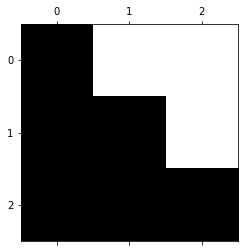

In [ ]:
stock_prices = np.zeros((N,N))

# Preencher a matriz da ação
stock_prices[0,0] = S0

for i in range(1, N):
    M = i + 1
    stock_prices[i, 0] = d*stock_prices[i-1, 0]
    for j in range(1, M):
        stock_prices[i, j] = u*stock_prices[i-1, j-1]
        
plt.spy(stock_prices)

In [ ]:
# Visualização
print(stock_prices)

[[50.          0.          0.        ]
 [41.89834428 59.66822897  0.        ]
 [35.10942507 50.         71.20595097]]


Formato da matriz construída:

| |0     | 1     | 2       | 3     | 4
|-|------|---    |---      |----   |---
|0| $S$  |       |         |       |  
|1|$Sd$  |$Su$   |         |       |
|2|$Sd^2$|$Sdu$  |$Su^2$   |       |
|3|$Sd^3$|$Sd^2u$|$Sdu^2$  |$Su^3$ |
|4|$Sd^4$|$Sd^3u$|$Sd^2u^2$|$Sdu^3$|$Su^4$

In [ ]:
## Árvore de 4 passos - Outro exemplo (outros valores)
sigma = 0.4
r = 0.01
T = 1
N = 5 # 4 passos
K = 102.5
S0 = 100

dt = T/(N-1)
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d)/(u - d)

print(f'u: {u}, d: {d}, p: {p}')

u: 1.2214027581601699, d: 0.8187307530779818, p: 0.4563822967785014


In [ ]:
stock_prices = np.zeros((N,N))

# Preencher a matriz da ação
stock_prices[0,0] = S0

for i in range(1, N):
    M = i + 1
    stock_prices[i, 0] = d*stock_prices[i-1, 0]
    for j in range(1, M):
        stock_prices[i, j] = u*stock_prices[i-1, j-1]
        
# Visualização
print(stock_prices)

[[100.           0.           0.           0.           0.        ]
 [ 81.87307531 122.14027582   0.           0.           0.        ]
 [ 67.0320046  100.         149.18246976   0.           0.        ]
 [ 54.88116361  81.87307531 122.14027582 182.21188004   0.        ]
 [ 44.93289641  67.0320046  100.         149.18246976 222.55409285]]


In [ ]:
# Construção da árvore da call
call_prices = np.zeros((N,N))

# Obtendo o payoff das opções no vencimento
# max(S_T - K, 0)
expiration = stock_prices[-1,:] - K # S_T - K
expiration.shape = (expiration.size,) # reajustando formato
expiration = np.where(expiration >= 0, expiration, 0) # max(0, S_T - K)
#print(expiration)

call_prices[-1,:] = expiration
#print(call_prices)

# Preenchendo restante da matriz (trazer os payoffs a valor presente)
for i in range(N - 2, -1, -1):
    for j in range(i+1):
        call_prices[i, j] = np.exp(-r*dt) * (p*call_prices[i+1, j+1] + (1-p)*call_prices[i+1, j])
        
print(f'Call: {call_prices[0,0]}')
#plt.spy(call_prices)
print(call_prices)

Call: 14.709673831491694
[[ 14.70967383   0.           0.           0.           0.        ]
 [  4.40436178  27.06547795   0.           0.           0.        ]
 [  0.           9.67475401  47.92880638   0.           0.        ]
 [  0.           0.          21.25185666  79.96780999   0.        ]
 [  0.           0.           0.          46.68246976 120.05409285]]


### Um exemplo de put

Mudando o exemplo da figura 3 para que a opção seja uma put, obtemos a seguinte árvore:

![Árvore de 2 passos para uma put](Imagens\12_04_Árvore_2_Passos_Put.png)
**Figura 4**: Árvore de dois passos para uma put com strike de 30.

Os preços da ação são os mesmos, mas a opção será exercida em nós diferentes e possui diferentes preços.
O payoff $f_{uu}$ é zero pois a opção não seria exercida. Em $f_{ud}$ e $f_{dd}$ é dado pela diferença entre o strike (30) e o valor da ação em cada nó.

O procedimento de rolar para trás pela árvore é o mesmo que antes.

$$ f_u = e^{-0.03 \cdot 0.5} (0.4984 \cdot 0.000 + 0.5016 \cdot 0) = 1.000 = 0.494 $$

$$ f_d = e^{-0.03 \cdot 0.5} (0.4984 \cdot 1.000 + 0.5016 \cdot 9.637) = 5.252 $$

E obtemos o valor presente da put dado pela árvore:

$$ f = e^{-0.03 \cdot 0.5} (0.4984 \cdot 0.494 + 0.5016 \cdot 5.252) = 2.838 $$

In [ ]:
# Construção da árvore da put
# max(0, K - S_T)

## Árvore de 2 passos
S0 = 29
K = 30
sigma = 0.25
r = 0.03
T = 1
N = 3


dt = T/(N-1)
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d)/(u - d)

print(f'u: {u}, d: {d}, p: {p}')

# Matriz da ação
stock_prices = np.zeros((N,N))
stock_prices[0,0] = S0

for i in range(1, N):
    M = i + 1
    stock_prices[i, 0] = d*stock_prices[i-1, 0]
    for j in range(1, M):
        stock_prices[i, j] = u*stock_prices[i-1, j-1]
        
print(stock_prices)

# Árvore da put
put_prices  = np.zeros ((N, N)) # csc_matrix( (N, N) )

# Obtendo o payoff das opções no vencimento
# max(K - S_T, 0)
expiration = K - stock_prices[-1,:] # S_T - K
expiration.shape = (expiration.size,) # reajustando formato
expiration = np.where(expiration >= 0, expiration, 0) # max(0, K - S_T)
print(expiration)

# Preenchendo os últimos nós da matriz da call
put_prices[-1, :] = expiration

# Preenchendo restante da matriz (trazer os payoffs a valor presente)
for i in range(N - 2, -1, -1):
    for j in range(i+1):
        put_prices[i, j] = np.exp(-r*dt) * (p*put_prices[i+1, j+1] + (1-p)*put_prices[i+1, j])

print(put_prices)
print(f'Preço da put: {put_prices[0,0]}')

u: 1.1933645794479497, d: 0.8379668855787558, p: 0.4984449311090994
[[29.          0.          0.        ]
 [24.30103968 34.6075728   0.        ]
 [20.36346654 29.         41.29945156]]
[9.63653346 1.         0.        ]
[[2.83771599 0.         0.        ]
 [5.25231851 0.49408789 0.        ]
 [9.63653346 1.         0.        ]]
Preço da put: 2.837715987847251


## Opções americanas

Até o momento, nós consideramos apenas opções europeias (que podem ser exercidas apenas no vencimento). Agora, vamos considerar algumas mudanças nos cálculos para lidar com opções americanas (que podem ser exercidas a qualquer momento até o vencimento).

Em cada nó, precisamos carregar dois cálculos para determinar:

- Quanto vale a opção se ela for exercida no nó;
- Quanto vale a opção se não for exercida.

Considere novamente a put da figura 4, mas agora supondo que seja americana. Este caso pode ser visualizado na figura 5:

![Árvore de 2 passos para uma put americana](Imagens\12_05_Árvore_2_Passos_Put_Americana.png)
**Figura 5**: Árvore de dois passos para uma put americana com strike de 30.

Os valores nos nós finais são os mesmos. Se aqueles nós forem alcançados (ou seja, se a opção não for exercida antecipadamente), a opção tem seu valor intrínseco de $max(K - S_T, 0)$, onde $K$ é o strike e $S_T$ é o preço da ação em $T$.

Considere o nó $S_u, f_u$. Se a opção for exercida neste nó, ela geraria um payoff de -4.608, ou seja, uma perda de 4.608. Claramente ela não deve ser exercida e, portanto, vale 0.494 (conforme cálculos anteriores). No nó $S_d, f_d$, ela possui dois valores:

- O valor se não for exercida de 5.252 (conforme figura 4);
- O valor da opção se for exercida: 5.699 (= 30 - 24.301).

Como 5.699 > 5.252, a opção deve ser exercida neste nó e, portanto, seu valor será 5.699.

No primeiro nó (valor presente), se a opção for exercida valerá 1 (= 30 - 29). Se não for exercida vale:

$$ f = e^{-0.03 \cdot 0.5} (0.4984 \cdot 0.494 + 0.5016 \cdot 5.699) = 3.058 $$

Portanto, não vale a pena exercê-la neste nó e seu valor inicial dado pela árvore de 2 passos é 3.058. Neste exemplo, o valor da característica americana é:

$$ 3.058 - 2.838 = 0.22 $$

Note que o procedimento de rolar para trás significa que o valor que calculamos noum nó reflete não apenas a possibilidade de exercício imediato, mas também a possibilidade de exercício antecipado em nós futuros.

In [ ]:
# Construção da árvore de put americana

## Árvore de 2 passos
S0 = 29
sigma = 0.25
r = 0.03
T = 1
N = 21
K = 30

dt = T/(N-1)
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d)/(u - d)

print(f'u: {u}, d: {d}, p: {p}')

# Matriz da ação
stock_prices = np.zeros((N,N))
stock_prices[0,0] = S0

for i in range(1, N):
    M = i + 1
    stock_prices[i, 0] = d*stock_prices[i-1, 0]
    for j in range(1, M):
        stock_prices[i, j] = u*stock_prices[i-1, j-1]
        
#print(stock_prices)

# Árvore da put
put_prices  = np.zeros ((N, N)) # csc_matrix( (N, N) )

# Obtendo o payoff das opções no vencimento
expiration = K - stock_prices[-1,:] # S_T - K
expiration.shape = (expiration.size,) # reajustando formato
expiration = np.where(expiration >= 0, expiration, 0) # max(0, K - S_T)
print(expiration)

# Preenchendo os últimos nós da matriz da call
put_prices[-1, :] = expiration

# Preenchendo restante da matriz (trazer os payoffs a valor presente)
for i in range(N - 2, -1, -1):
    for j in range(i+1):
        exer = K - stock_prices[i, j] # exercicio antecipado no instante i
        keep = np.exp(-r*dt) * (p*put_prices[i+1, j+1] + (1-p)*put_prices[i+1, j]) # Preço da opção mantendo em carteira, igual europeia
        put_prices[i, j] = max(exer, keep) # Máximo entre exercer neste nó ou manter

#print(put_prices)
print(f'Preço da put: {put_prices[0,0]}')

u: 1.0574937263990118, d: 0.9456320874878473, p: 0.49944769823399815
[20.51926503 19.39776063 18.14359013 16.74106005 15.17262052 13.41864559
 11.45718774  9.2637032   6.81074483  4.0676187   1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Preço da put: 3.082148426266647


### Aumentando o número de passos

Árvores com mais que dois passos podem ser abordadas da mesma forma que vimos até agora. Suponha que usemos 4 passso ao invés de 2 para valorizar a opção americana da seção anterior (figura 5). Temos que: $\Delta t = 0.25$ e:

$$ u = e^{0.25 \cdot 0.25} = 1.1331$$

$$ d = e^{-0.25 \cdot 0.25} = 0.8825$$

$$ p = \frac{e^{-0.03 \cdot 0.25} - 0.8825}{1.1331 - 0.8825} = 0.4988$$

A nova árvore é apresentada na figura 6:

![Árvore de 2 passos para uma put americana](Imagens\12_06_Árvore_4_Passos_Put_Americana.png)
**Figura 6**: Árvore de 4 passos para uma put americana com strike de 30.

A opção é exercida antecipadamente em 3 nós. O valor calculado para a opção é 3.097, um pouco maior que o dado pela figura 5, usando 2 passos.

A precisão cresce conforme o número de passos cresce. Para a opção considerada teríamos:

Passos | Preço da opção
-------|---------------
2   | 3.058
4   | 3.097
20  | 3.082
50  | 3.067
100 | 3.059
500 | 3.055

Na prática, são usados ao menos de 30 a 50 passos.
Árvores binomiais utilizam a premissa do passeio aleatório (random walk), que também é utilizado no modelo Black-Scholes-Merton para avaliar opções europeias. Pode ser provado que, conforme o número de passos cresce, o preço de uma opção europeia dado pela árvore binomial converge para o preço dado pelo Black-Scholes-Merton.

In [ ]:
# Cria matriz do ativo objeto
def stock_tree(S0, T, r, sigma, N):
    dt = T/(N-1)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u #np.exp(-sigma * np.sqrt(dt)) # (É equivalente)
    p = (np.exp(r*dt) - d)/(u - d)

    stock_prices = np.zeros((N, N))
    stock_prices[0,0] = S0
    for i in range(1, N):
        M = i + 1
        stock_prices[i, 0] = d*stock_prices[i-1, 0]
        for j in range(1, M):
            stock_prices[i, j] = u*stock_prices[i - 1, j-1]
    return stock_prices
    
def euro_call_tree(stock_prices, T, r, sigma, N):
    dt = T/(N-1)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u #np.exp(-sigma * np.sqrt(dt)) # (É equivalente)
    p = (np.exp(r*dt) - d)/(u - d)
    
    call_prices = np.zeros((N, N))
    expiration = stock_prices[-1,:] - K # S_T - K
    expiration.shape = (expiration.size,) # reajustando formato
    expiration = np.where(expiration >= 0, expiration, 0) # max(0, S_T - K)
    call_prices[-1,:] = expiration
    for i in range(N - 2, -1, -1):
        for j in range(i+1):
            call_prices[i, j] = np.exp(-r*dt) * (p*call_prices[i+1, j+1] + (1-p)*call_prices[i+1, j])
    
    return call_prices   

def amer_put_tree(stock_prices, T, r, sigma, N):
    dt = T/(N-1)
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u #np.exp(-sigma * np.sqrt(dt)) # (É equivalente)
    p = (np.exp(r*dt) - d)/(u - d)
    
    put_prices = np.zeros((N, N))
    expiration = K - stock_prices[-1,:] # K - S_T
    expiration.shape = (expiration.size,) # reajustando formato
    expiration = np.where(expiration >= 0, expiration, 0) # max(0, K - S_T)
    put_prices[-1,:] = expiration
    for i in range(N - 2, -1, -1):
        for j in range(i+1):
            keep = np.exp(-r*dt) * (p*put_prices[i+1, j+1] + (1-p)*put_prices[i+1, j])
            exer = K - stock_prices[i, j]
            put_prices[i, j] = max(keep, exer)
    
    return put_prices

In [ ]:
# Insumos
S0 = 29
K = 30
r = 0.03
sigma = 0.25
T = 1
N = 3

# Verificando as funções
stock_prices = stock_tree(S0, T, r, sigma, N)
print(stock_prices)
call_prices = euro_call_tree(stock_prices, T, r, sigma, N)
print(f'Call europeia: {call_prices[0,0]}')
put_amer_prices = amer_put_tree(stock_prices, T, r, sigma, N)
print(f'Put americana: {put_amer_prices[0,0]}')

[[29.          0.          0.        ]
 [24.30103968 34.6075728   0.        ]
 [20.36346654 29.         41.29945156]]
Call europeia: 2.724349981392003
Put americana: 3.058396296819471


Passos | Preço da opção
-------|---------------
2   | 3.058
4   | 3.097
20  | 3.082
50  | 3.067
100 | 3.059
500 | 3.055

In [ ]:
# Simulando diferentes qtdes de passos
Ns = [2, 4, 20, 50, 100, 500, 1000]
for n in Ns:
    N = n + 1
    stock_prices = stock_tree(S0, T, r, sigma, N)
    call_prices = euro_call_tree(stock_prices, T, r, sigma, N)
    put_amer_prices = amer_put_tree(stock_prices, T, r, sigma, N)
    print(f'N: {N}, Call: {round(call_prices[0,0], 3)}, Put Amer: {round(put_amer_prices[0,0], 3)}')

N: 3, Call: 2.724, Put Amer: 3.058
N: 5, Call: 2.818, Put Amer: 3.097
N: 21, Call: 2.858, Put Amer: 3.082
N: 51, Call: 2.848, Put Amer: 3.067
N: 101, Call: 2.839, Put Amer: 3.059
N: 501, Call: 2.836, Put Amer: 3.055
N: 1001, Call: 2.834, Put Amer: 3.054


In [ ]:
# Black-Scholes
from scipy.stats import norm # distribuição normal

def calc_BS(S, K, r, T, sigma, tipo):
    # Cálculo do d1
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma*np.sqrt(T)
    # Cálculo do d2
    d2 = d1 - sigma*np.sqrt(T)
    
    if tipo == 'call':
        # Preço se for call (opção de compra)
        price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    elif tipo == 'put':
        # preço se for put (opção de venda)
        price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    else:
        # Não sei o tipo, não calculo
        price = None
    
    return price # Preço/prêmio

In [ ]:
# Comparando com o BS
calc_BS(S0, K, r, T, sigma, 'call')

2.8341228142744015

## Outros ativos

Até agora, consideramos opções sobre opção que não pagam dividendos. Para considerar outros ativos, será útil analisarmos uma ação que paga uma taxa de dividendos contínuos $q$ (isso significa que o dividendo pago por um curto período $\Delta t$ é o preço da ação multiplicado por $q$ multiplicado por $\Delta t).

Um rendimento $q$ implica que as fórmulas que apresentamos até o momento devem ser levemente ajustadas. O retorno total num mundo neutro ao risco é $r$. Os dividendos proveem um retorno de $q$. O crescimento esperado no preço da ação deve ser então $r - q$. Lembrando que temos:

$$ pSu + (1 - p)Sd = S e^{r \Delta t} $$

quando não há dividendos, tal que:

$$ p = \frac{e^{r \Delta t} - d}{u - d} $$

No caso onde dividendos são pagos a uma taxa $q$, temos:

$$ pSu + (1 - p)Sd = S e^{(r-q) \Delta t} $$

Tal que:

$$ p = \frac{e^{(r-q) \Delta t} - d}{u - d} $$

Todo o restante da árvore permanece igual antes, inclusive os cálculos de $u$ e $d$ e o procedimento de rolar para trás.

### Índices de ação

Para uma opção sobre um índice de ações, geralmente assume-se que o índice provê uma taxa de dividendos. A valorização de uma opção sobre um índice deve portanto incluir a modificação apresentada acima. Definimos $q$ igual à taxa de dividendos média estimada durante a vida da opção.

### Moedas

Conforme apresentado na aula 5 de derivativos, a projeção de uma moeda é realizada como se fosse um ativo que rende à taxa livre de risco estrangeira. Portanto, a análise apresentada para os dividendos contínuos se aplicam, com $q$ igual à taxa livre de risco estrangeira ($r_x$). Isto significa que:

$$ p = \frac{e^{(r-r_x) \Delta t} - d}{u - d} $$

O restante permanece igual aos demais casos abordados.

### Futuros

Como não custa nada entrar num contrato futuro, o retorno de um contrato futuro num mundo neutro ao risco deve ser zero. isto significa que podemos tratar um contrato futuro como uma ação, pagando uma taxa de dividendos contínua igual à $r$. Isto porque quando $q = r$, a taxa esperada de crescimento da ação é zero. Portanto:

$$ p = \frac{1 - d}{u - d} $$

e o restante permanece igual aos demais casos.

## Referências

- J. C. Cox, S. A. Ross, M. Rubistein, "Option Pricing: A Simplified Approach", Journal of Financial Economics 7 (Outubro/1979): 229-264.
- I. V. Girsanov, "On transforming a certain class of stochastic processes by absolutely continuous substitution of measures", Theory of Probability and its Applications, 5, 3 (1960): 285-301.
- J. Hull, "Risk Management and Financial Institutions", 5th edition, Wiley.